In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공

In [3]:
locCode = pd.read_excel('../../data/법정동코드.xlsx')

locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode = locCode[locCode['읍면동명'].isnull()]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode = locCode[locCode['시군구명'].notnull()]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['지역코드'] = locCode['법정동코드'].astype(str).str.slice(start=0,stop=5)
locCode['지역코드'] = locCode['법정동코드'].astype(str).str[:5]
locCode

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN,11140
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN,11170
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN,11200
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN,11215
...,...,...,...,...,...,...,...,...
19906,4887000000,경상남도,함양군,NaN,NaN,19880423,NaN,48870
20021,4888000000,경상남도,거창군,NaN,NaN,19880423,NaN,48880
20128,4889000000,경상남도,합천군,NaN,NaN,19880423,NaN,48890
20339,5011000000,제주특별자치도,제주시,NaN,NaN,20060701,NaN,50110


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
loc = locCode[['시도명','시군구명','지역코드']][locCode['시도명']=='서울특별시']

loc = loc.astype({'지역코드':'int64'})

loc

,시도명,시군구명,지역코드
1,서울특별시,종로구,11110
89,서울특별시,중구,11140
164,서울특별시,용산구,11170
201,서울특별시,성동구,11200
219,서울특별시,광진구,11215
227,서울특별시,동대문구,11230
238,서울특별시,중랑구,11260
245,서울특별시,성북구,11290
285,서울특별시,강북구,11305
290,서울특별시,도봉구,11320


# 2. 실거래가 데이터 가공

In [8]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../../data/2019년 서울 아파트 실거래가.csv', encoding='cp949')

apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [9]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['건축년도', '거래년도', '거래월', '거래일자', '법정동', '거래금액', '아파트이름', '전용면적', '지역코드',
       '층', '지번'],
      dtype='object')

In [10]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(68864, 11)

In [11]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum()

건축년도     0
거래년도     0
거래월      0
거래일자     0
법정동      0
거래금액     0
아파트이름    0
전용면적     0
지역코드     0
층        0
지번       0
dtype: int64

In [12]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [13]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경
apt['거래금액']=apt['거래금액'].str.replace(',', '').astype('int64')
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73
...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686


In [14]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
print(apt.info())
print(loc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  int64  
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 483
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     25 non-null     object
 1   시군구명    25 non-null     object
 2   지역코드    25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes
None


In [15]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)']=(apt[['전용면적']]/3.306).round(2)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [16]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
apt['전용면적(평)2'] = apt['전용면적(평)'].astype('int64')
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [17]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt['전용면적(평)2']) / 5) + 2) * 5, 5)
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], daterange)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [18]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [19]:
#분기 추가하기
#apt.loc[ (컬럼조건문), 새로운컬럼 ]
apt.loc[(apt['거래월'].isin([1,2,3])),'분기']='1분기'
apt.loc[(apt['거래월'].isin([4,5,6])),'분기']='2분기'
apt.loc[(apt['거래월'].isin([7,8,9])),'분기']='3분기'
apt.loc[(apt['거래월'].isin([10,11,12])),'분기']='4분기'

#반기 추가하기 , 분기조건으로 반기 추가
#apt.loc[ (컬럼조건문), 새로운컬럼 ]
apt.loc[(apt['분기'].isin(['1분기','2분기'])),'반기']='상반기'
apt.loc[(apt['분기'].isin(['3분기','4분기'])),'반기']='하반기'


#평당거래금액 추가하기
apt['평당거래금액'] = round(apt['거래금액']/apt['전용면적(평)'])

apt

# apt[(apt['거래월'].isin([1,2,3]))

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,분기,반기,평당거래금액
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",1분기,상반기,3556.0
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",1분기,상반기,3279.0
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",1분기,상반기,2993.0
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",1분기,상반기,2671.0
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",1분기,상반기,3515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",4분기,하반기,3554.0
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",4분기,하반기,3119.0
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",4분기,하반기,3036.0
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",4분기,하반기,3118.0


# 3. 데이터 프레임 결합

In [20]:
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,분기,반기,평당거래금액
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",1분기,상반기,3556.0
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",1분기,상반기,3279.0
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",1분기,상반기,2993.0
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",1분기,상반기,2671.0
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",1분기,상반기,3515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",4분기,하반기,3554.0
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",4분기,하반기,3119.0
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",4분기,하반기,3036.0
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",4분기,하반기,3118.0


In [21]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df = pd.merge(apt,loc,on='지역코드',how='left')
df

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,분기,반기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",1분기,상반기,3556.0,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",1분기,상반기,3279.0,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",1분기,상반기,2993.0,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",1분기,상반기,2671.0,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",1분기,상반기,3515.0,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",4분기,하반기,3554.0,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",4분기,하반기,3119.0,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",4분기,하반기,3036.0,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",4분기,하반기,3118.0,서울특별시,강동구


In [22]:
# 지역 코드 컬럼을 삭제합니다.
df.drop(['지역코드'],axis='columns',inplace=True)
df

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,분기,반기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",1분기,상반기,3556.0,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",1분기,상반기,3279.0,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",1분기,상반기,2993.0,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",1분기,상반기,2671.0,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",1분기,상반기,3515.0,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11,164-70,4.08,4,"(0, 5]",4분기,하반기,3554.0,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,9,695,25.57,25,"(20, 25]",4분기,하반기,3119.0,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,4,668,25.63,25,"(20, 25]",4분기,하반기,3036.0,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,3,686,25.66,25,"(20, 25]",4분기,하반기,3118.0,서울특별시,강동구


In [23]:
# raw_data = pd.DataFrame(df) #데이터 프레임으로 전환
# raw_data.to_excel(excel_writer='D:/python_workspace/data/mergedata01.xlsx') #엑셀로 저장

In [24]:
df['법정동'].unique()

array([' 사직동', ' 내수동', ' 견지동', ' 효제동', ' 명륜1가', ' 명륜2가', ' 명륜3가', ' 창신동',
       ' 숭인동', ' 평창동', ' 익선동', ' 연건동', ' 평동', ' 홍파동', ' 무악동', ' 인의동',
       ' 동숭동', ' 교북동', ' 구기동', ' 청운동', ' 누상동', ' 옥인동', ' 필운동', ' 행촌동',
       ' 당주동', ' 이화동', ' 신영동', ' 교남동', ' 부암동', ' 충신동', ' 회현동1가', ' 충무로5가',
       ' 신당동', ' 흥인동', ' 황학동', ' 중림동', ' 남창동', ' 충무로4가', ' 오장동',
       ' 남대문로5가', ' 회현동2가', ' 필동3가', ' 순화동', ' 만리동1가', ' 인현동2가', ' 묵정동',
       ' 장충동2가', ' 정동', ' 산림동', ' 만리동2가', ' 장충동1가', ' 을지로5가', ' 예장동',
       ' 후암동', ' 용산동2가', ' 동자동', ' 원효로4가', ' 도원동', ' 한강로3가', ' 이촌동',
       ' 이태원동', ' 한남동', ' 서빙고동', ' 산천동', ' 효창동', ' 문배동', ' 한강로1가',
       ' 한강로2가', ' 원효로1가', ' 신창동', ' 보광동', ' 청파동3가', ' 용산동5가', ' 동빙고동',
       ' 용문동', ' 신계동', ' 갈월동', ' 청파동1가', ' 청암동', ' 원효로2가', ' 원효로3가',
       ' 하왕십리동', ' 홍익동', ' 마장동', ' 사근동', ' 행당동', ' 응봉동', ' 금호동2가',
       ' 금호동3가', ' 금호동4가', ' 옥수동', ' 성수동1가', ' 성수동2가', ' 송정동', ' 금호동1가',
       ' 용답동', ' 상왕십리동', ' 도선동', ' 중곡동', ' 구의동', ' 광장동', ' 자양동', ' 화양동',
       ' 군자동

In [25]:
df[df['층']==1].count()

건축년도        3358
거래년도        3358
거래월         3358
거래일자        3358
법정동         3358
거래금액        3358
아파트이름       3358
전용면적        3358
층           3358
지번          3358
전용면적(평)     3358
전용면적(평)2    3358
전용면적(평)3    3358
분기          3358
반기          3358
평당거래금액      3358
시도명         3358
시군구명        3358
dtype: int64

# 4. 데이터 분석

#### 5번 각 구에따른 평당 거래금액 분포도 - 각 구마다 건축 연도에 비례한 가장 싸거나 비싼 아파트를 알 수 있다.

In [26]:
df1 = df[['시군구명','평당거래금액','건축년도']]
df1.head(1000)

,시군구명,평당거래금액,건축년도
0,종로구,3556.0,2008
1,종로구,3279.0,2008
2,종로구,2993.0,2008
3,종로구,2671.0,2008
4,종로구,3515.0,2004
...,...,...,...
995,중구,4045.0,2012
996,중구,3218.0,2005
997,중구,3125.0,2010
998,중구,2403.0,2011


(1975.0, 2019.0)

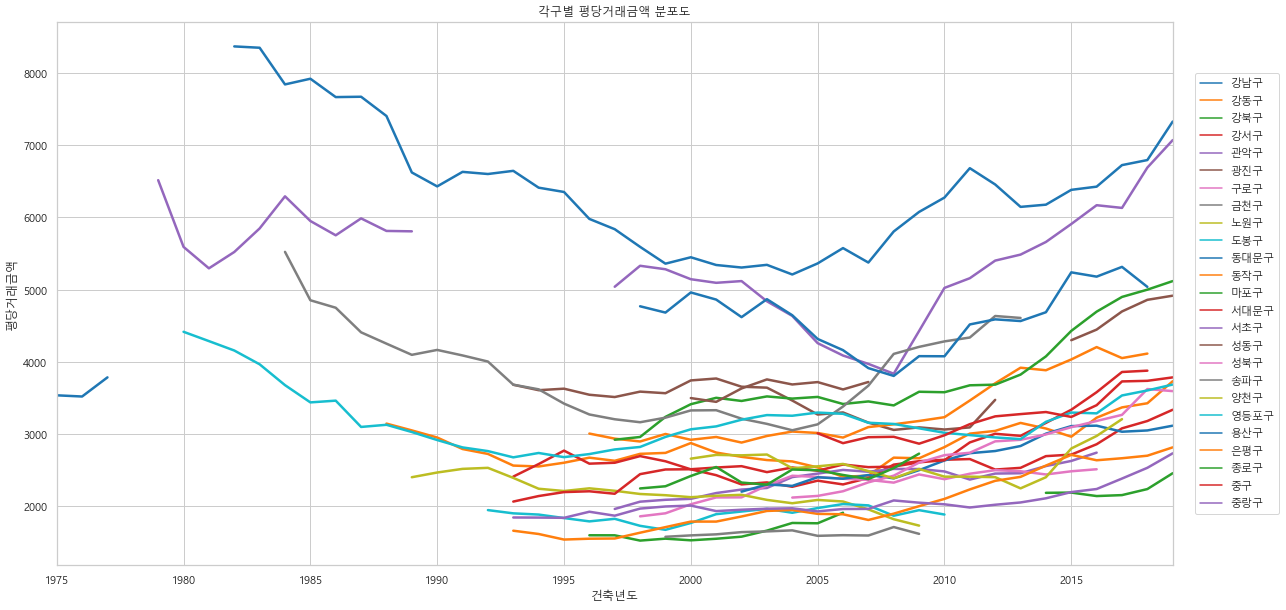

In [27]:
df2 = df1.pivot_table(values='평당거래금액', columns=['시군구명'], index=['건축년도'])
df2 = df2.rolling(7).mean()
df2.head(1000)

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')


plt.rcParams["figure.figsize"] = (20,10)
# plt.rcParams['lines.linewidth'] = 2.5
# plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# sns.set_theme(style="whitegrid")
sns.lineplot(data=df2,palette="tab10", linewidth=2.5,dashes=False)
# marker='s',ms=10,

plt.legend(loc='center right',bbox_to_anchor=(1.1,0.5))
plt.xlabel('건축년도')
plt.ylabel('평당거래금액')

plt.title('각구별 평당거래금액 분포도')
plt.xlim([1975 , 2019])


In [28]:
# grid = sns.FacetGrid(data=df1, col='시군구명')
# grid.map(sns.lineplot, "건축년도", "평당거래금액")

In [29]:
'''
각구에 따른 가장 싼 비싼 아파트 거래량 분포도
'''
df3 = df[['시군구명','거래금액','건축년도','아파트이름']]

df4 = df3.loc[df3.groupby(['시군구명'])['거래금액'].idxmax()]
df4_1 = df4.sort_values(by='시군구명',ascending=True).reset_index()

df5 = df3.loc[df3.groupby(['시군구명'])['거래금액'].idxmin()]
df5_1 = df5.sort_values(by='시군구명',ascending=True).reset_index()


df6 = pd.merge(df4, df5 , on='시군구명')
df7 = df6.rename({'거래금액_x':'최고거래금액','건축년도_x':'max건축년도','거래금액_y':'최저거래금액','건축년도_y':'min건축년도'},axis='columns')
# merge_outer = pd.merge(df1,df2, how='outer',on='id')
df5_1

,index,시군구명,거래금액,건축년도,아파트이름
0,55623,강남구,18000,2015,힐스테이트6
1,67057,강동구,8900,2012,현대웰하임(201동)
2,15628,강북구,12400,1975,화계맨숀
3,39644,강서구,8000,2013,한양아이클래스
4,50343,관악구,10500,2010,아데나
5,6033,광진구,6900,1999,화양타워
6,41903,구로구,5400,1995,성산E동
7,43668,금천구,6500,1975,시흥(817-29)
8,19857,노원구,8500,2012,진명비베레
9,17683,도봉구,9000,2002,한솔캐스빌


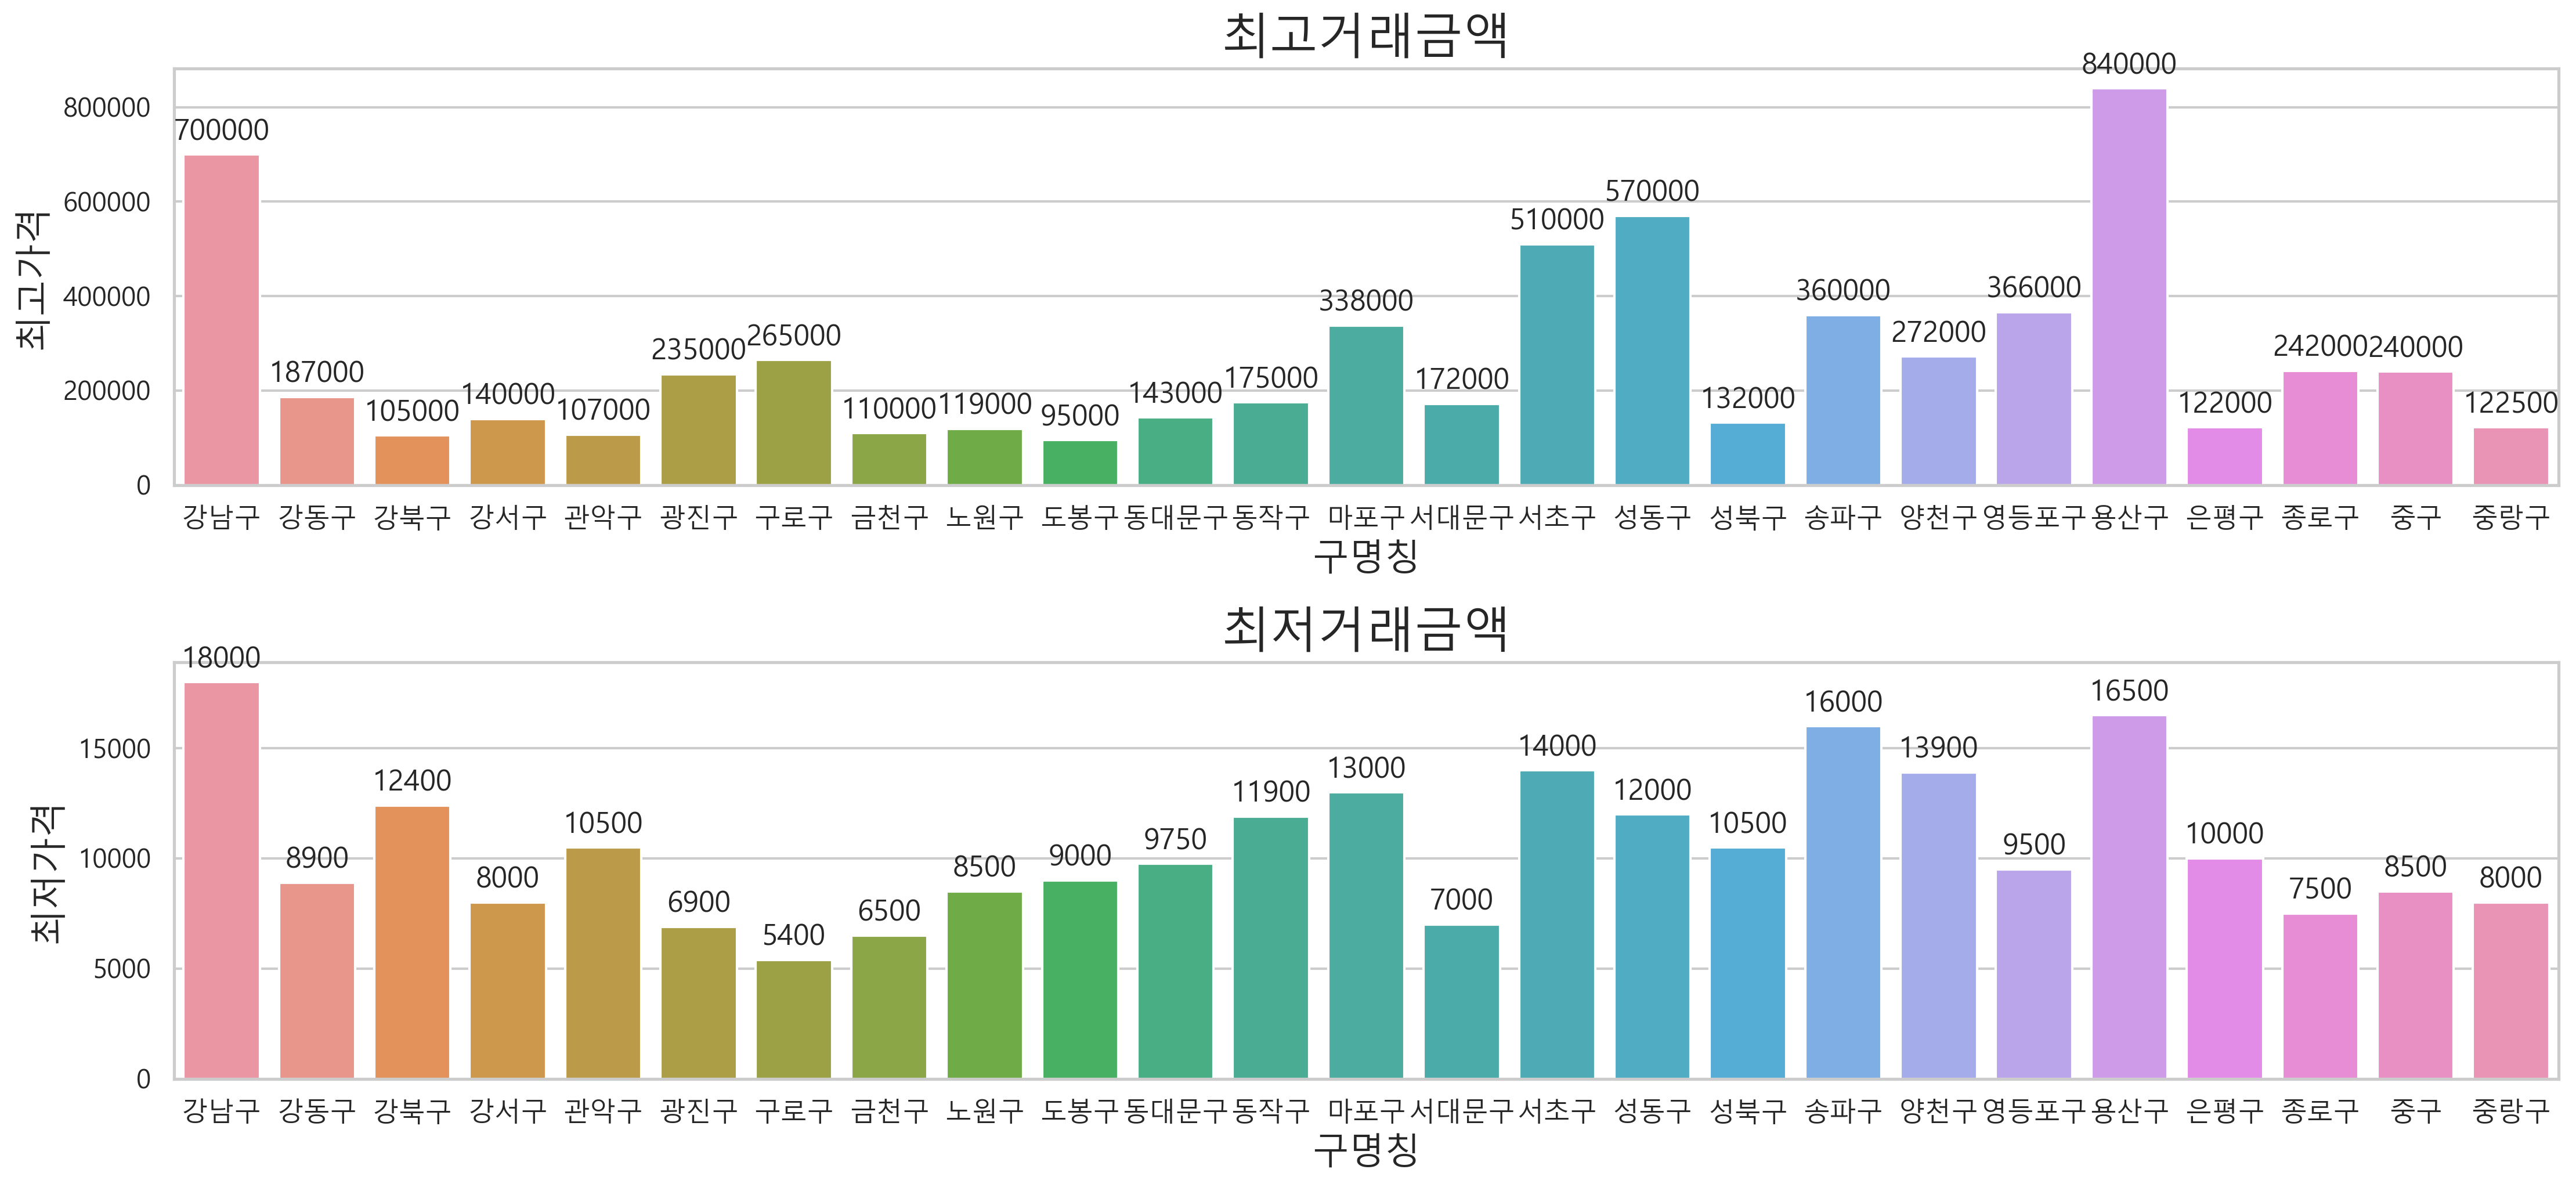

In [30]:
'''
년도 내림차순 O
'''

fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300, sharex=False)

max_bar = sns.barplot(x="시군구명", y="거래금액", data=df4_1,ax=ax[0])
ax[0].set_xlabel(xlabel = '구명칭', fontsize = 15)
ax[0].set_ylabel(ylabel = '최고가격', fontsize = 15)
ax[0].set_title(label = '최고거래금액', fontsize = 20)
for p in max_bar.patches:
    max_bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

min_bar = sns.barplot(x="시군구명", y="거래금액", data=df5_1,ax=ax[1])
ax[1].set_xlabel(xlabel = '구명칭', fontsize = 15)
ax[1].set_ylabel(ylabel = '최저가격', fontsize = 15)
ax[1].set_title(label = '최저거래금액', fontsize = 20)
for p in min_bar.patches:
    min_bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



# plt.xticks(rotation = 45 )
plt.tight_layout()
plt.show()

In [31]:
'''
년도 내림차순x
'''

# fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300, sharex=True)
# # .sort_values(by='건축년도',ascending=False)
# data1 = df4_1.pivot_table(index='시군구명',values=['거래금액']).reset_index()
# data2 = df5_1.pivot_table(index='시군구명',values=['거래금액']).reset_index()

# max_bar = sns.barplot(x = data1['시군구명'], y = data1['거래금액'], palette = 'husl',ax=ax[0])
# ax[0].set_xlabel(xlabel = '구명칭', fontsize = 0)
# ax[0].set_ylabel(ylabel = '최고가격', fontsize = 15)
# ax[0].set_title(label = '최고거래금액', fontsize = 15)
# # ax[0].set_xticklabels(xlabels)
# # fig.autofmt_xdate(rotation=45)
# # # ax[0].set_xticklabels('시군구명', rotation = 45)

# # # plt.xticks(rotation = 45 )
# min_bar = sns.barplot(x = data2['시군구명'], y = data2['거래금액'], palette = 'husl',ax=ax[1])
# ax[1].set_xlabel(xlabel = '구명칭', fontsize = 15)
# ax[1].set_ylabel(ylabel = '최저가격', fontsize = 15)
# ax[1].set_title(label = '최저거래금액', fontsize = 15)



# plt.tight_layout()
# plt.show()

'\n년도 내림차순x\n'

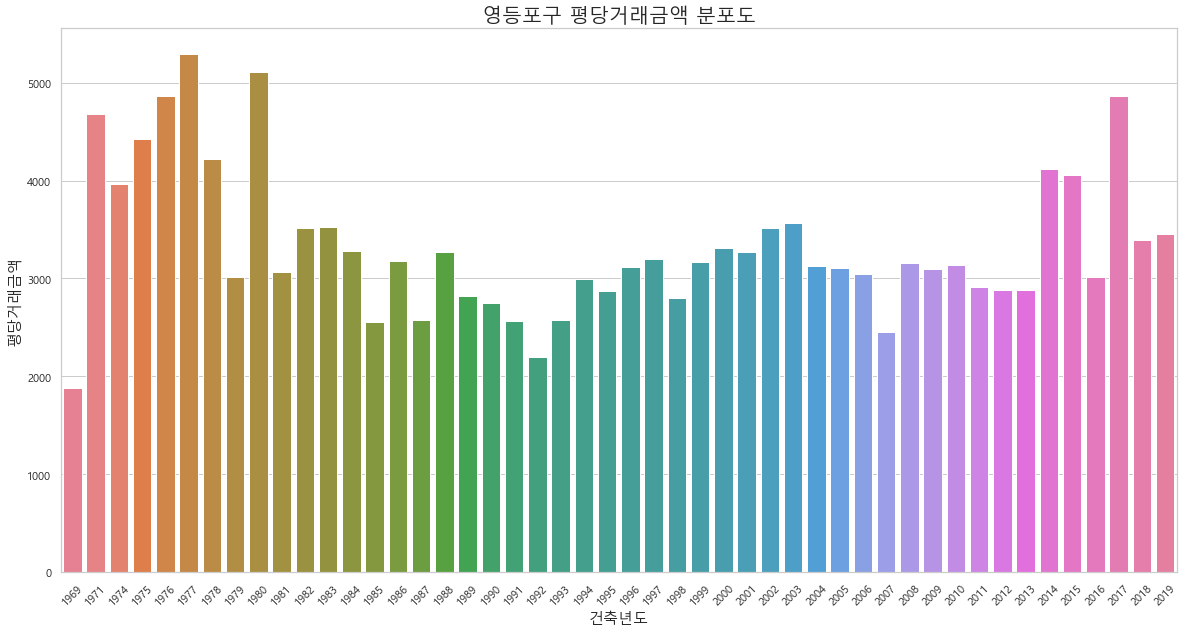

In [32]:
'''
각각 구마다 건축 연도에 비례한 평당거래금액의 분포도 - 
건축연도가 오래됬을수록 금액은 낮다는걸 예상하는데 예상을 벗어나는 구가 있는지 분포도를 통해 알 수 있다.
'''
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_ydp = df['시군구명'] == '영등포구'
ydp=df[is_ydp]

df_ydp = ydp[['시군구명','평당거래금액','건축년도','아파트이름']]

plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)

plt.title('영등포구 평당거래금액 분포도',size=20)
plt.xticks(rotation = 45 )
ydpbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_ydp,palette = 'husl',ci=None)
plt.savefig("영등포구.png")


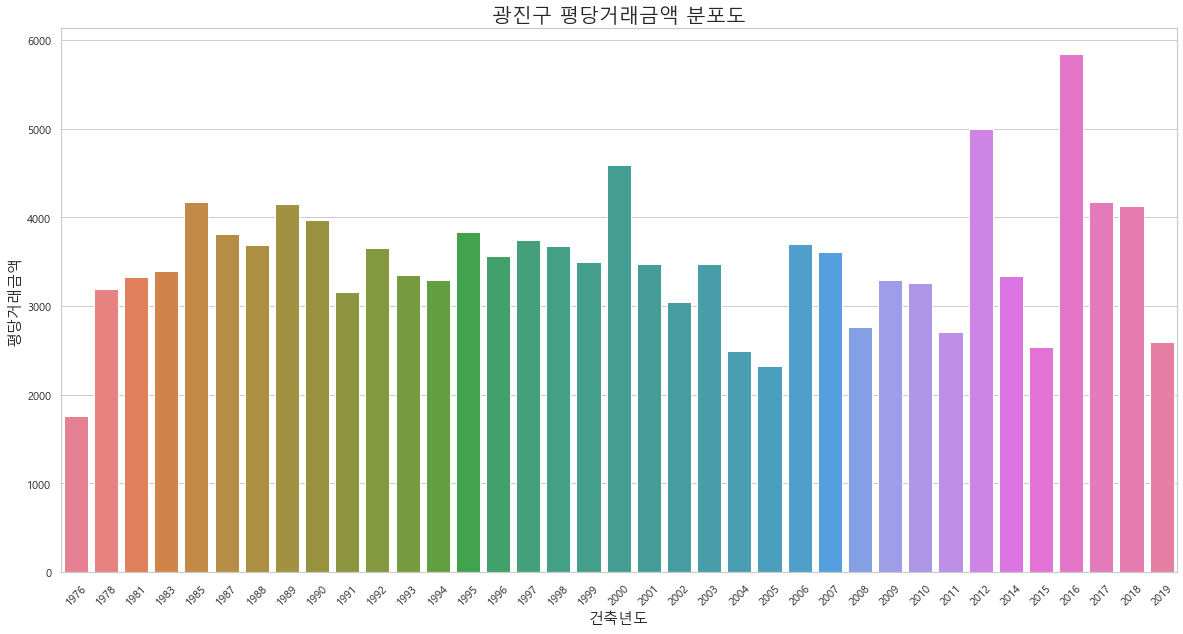

In [33]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gj = df['시군구명'] == '광진구'
gj=df[is_gj]

df_gj = gj[['시군구명','평당거래금액','건축년도','아파트이름']]

plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)

plt.title('광진구 평당거래금액 분포도',size=20)
plt.xticks(rotation = 45 )
gjbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gj,palette = 'husl',ci=None)
plt.savefig("광진구.png")

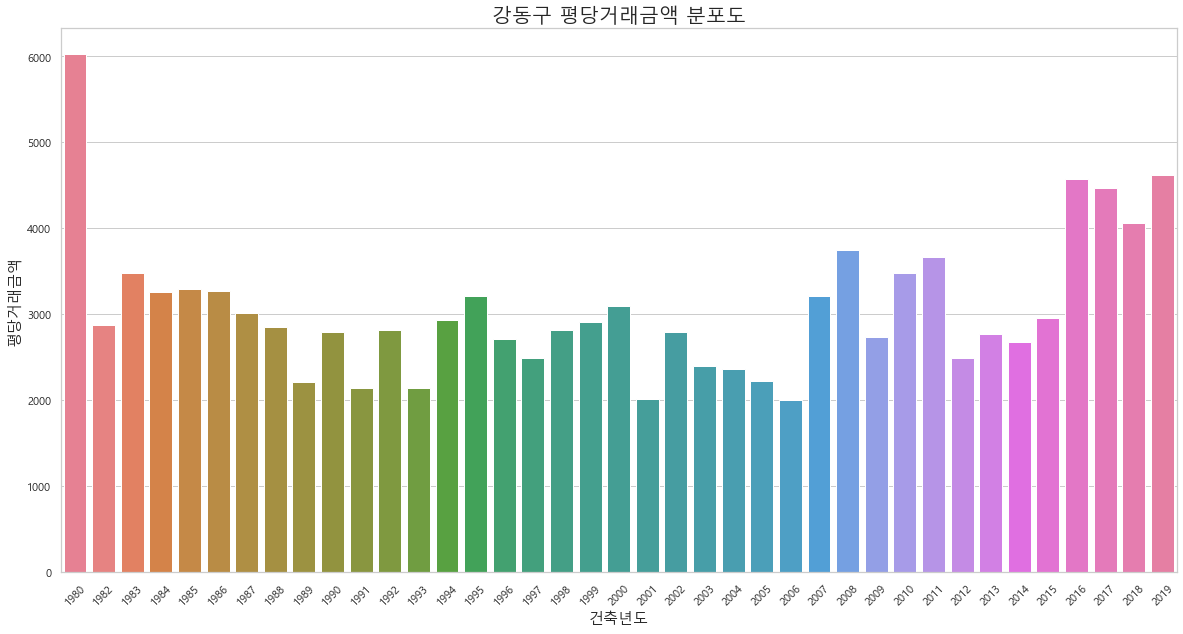

In [34]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gd = df['시군구명'] == '강동구'
gd=df[is_gd]

df_gd = gd[['시군구명','평당거래금액','건축년도','아파트이름']]

plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)

plt.title('강동구 평당거래금액 분포도',size=20)
plt.xticks(rotation = 45 )
gdbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gd,palette = 'husl',ci=None)
plt.savefig("강동구.png")

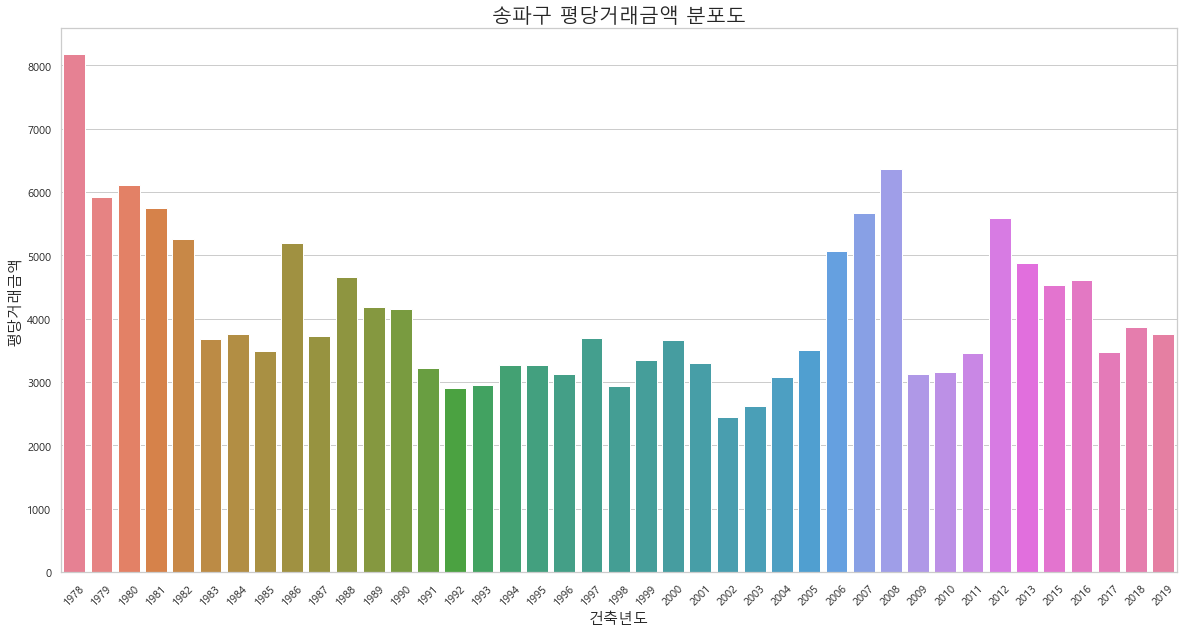

In [35]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_sp = df['시군구명'] == '송파구'
sp=df[is_sp]

df_sp = sp[['시군구명','평당거래금액','건축년도','아파트이름']]

plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)

plt.title('송파구 평당거래금액 분포도',size=20)
plt.xticks(rotation = 45 )
spbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_sp,palette = 'husl',ci=None)
plt.savefig("송파구.png")

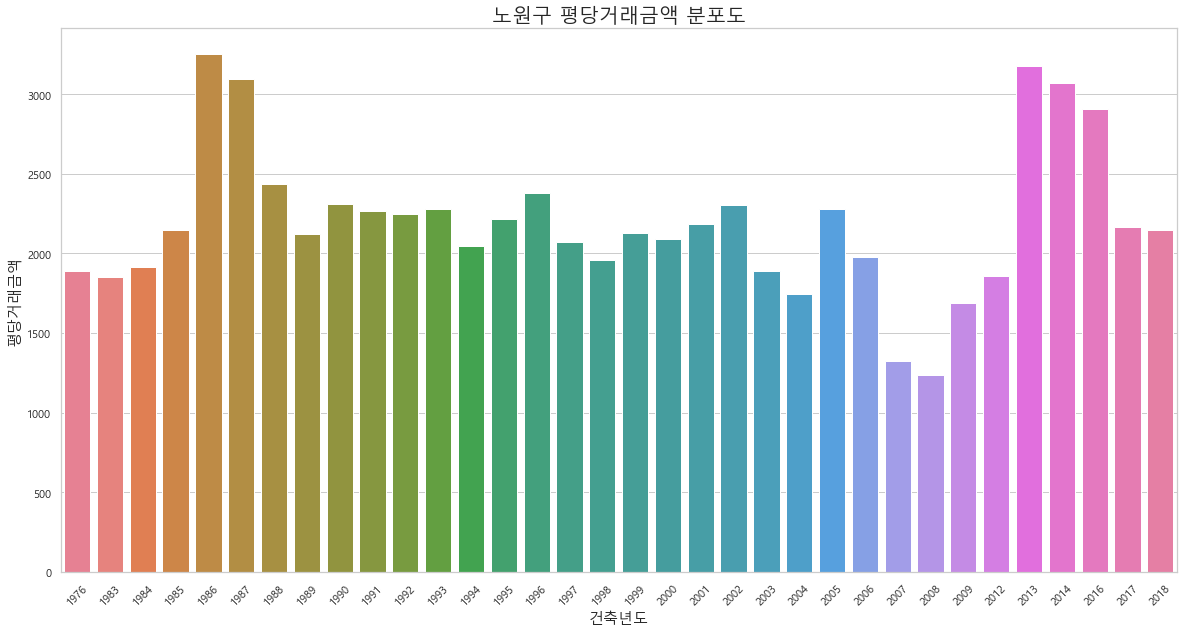

In [36]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_no = df['시군구명'] == '노원구'
no=df[is_no]
df_no = no[['시군구명','평당거래금액','건축년도','아파트이름']]
nobar = sns.barplot(x="건축년도", y="평당거래금액", data=df_no,palette = 'husl',ci=None)


plt.title('노원구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("노원구.png")

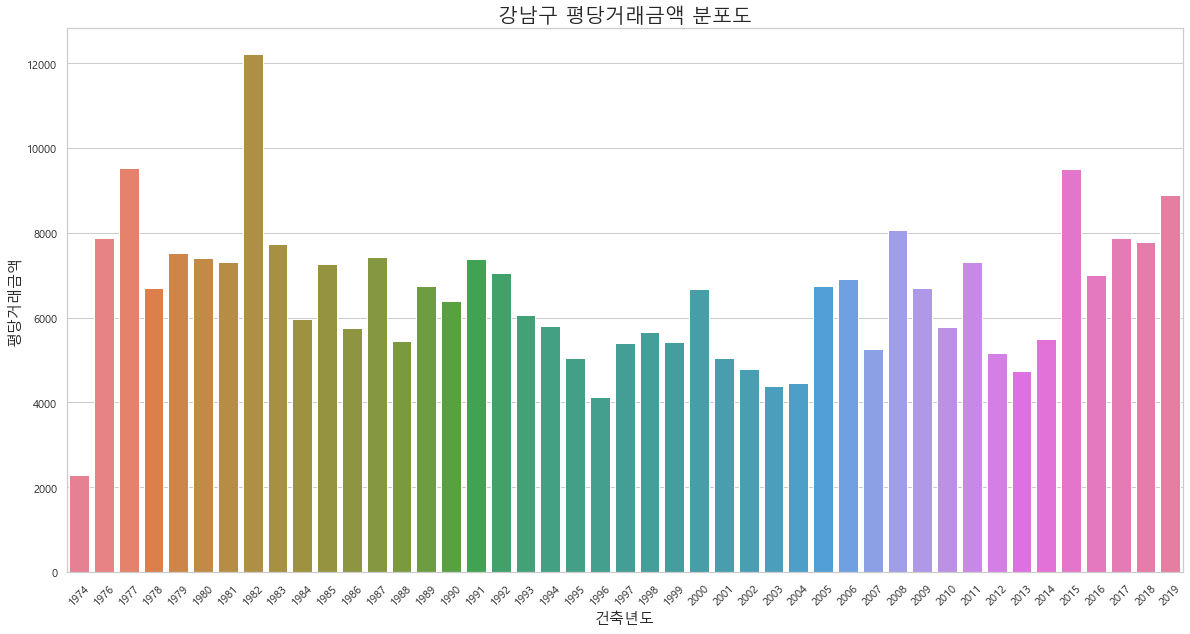

In [37]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gn = df['시군구명'] == '강남구'
gn=df[is_gn]
df_gn = gn[['시군구명','평당거래금액','건축년도','아파트이름']]
gnbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gn,palette = 'husl',ci=None)


plt.title('강남구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("강남구.png")

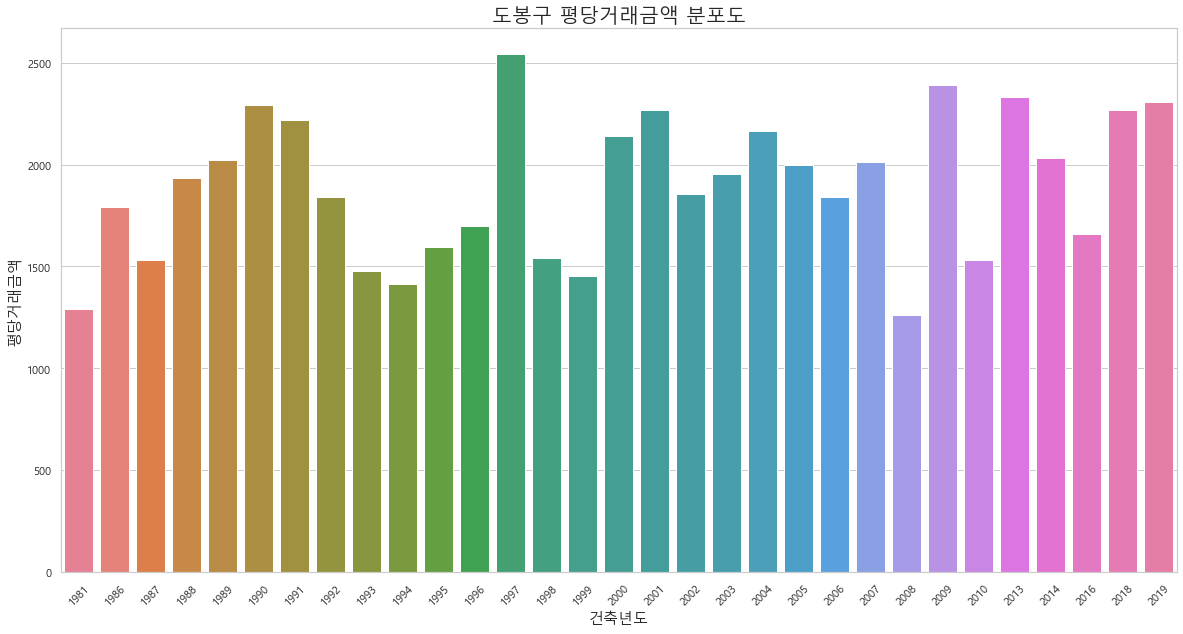

In [38]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_db = df['시군구명'] == '도봉구'
db=df[is_db]
df_db = db[['시군구명','평당거래금액','건축년도','아파트이름']]
dbbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_db,palette = 'husl',ci=None)


plt.title('도봉구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("도봉구.png")

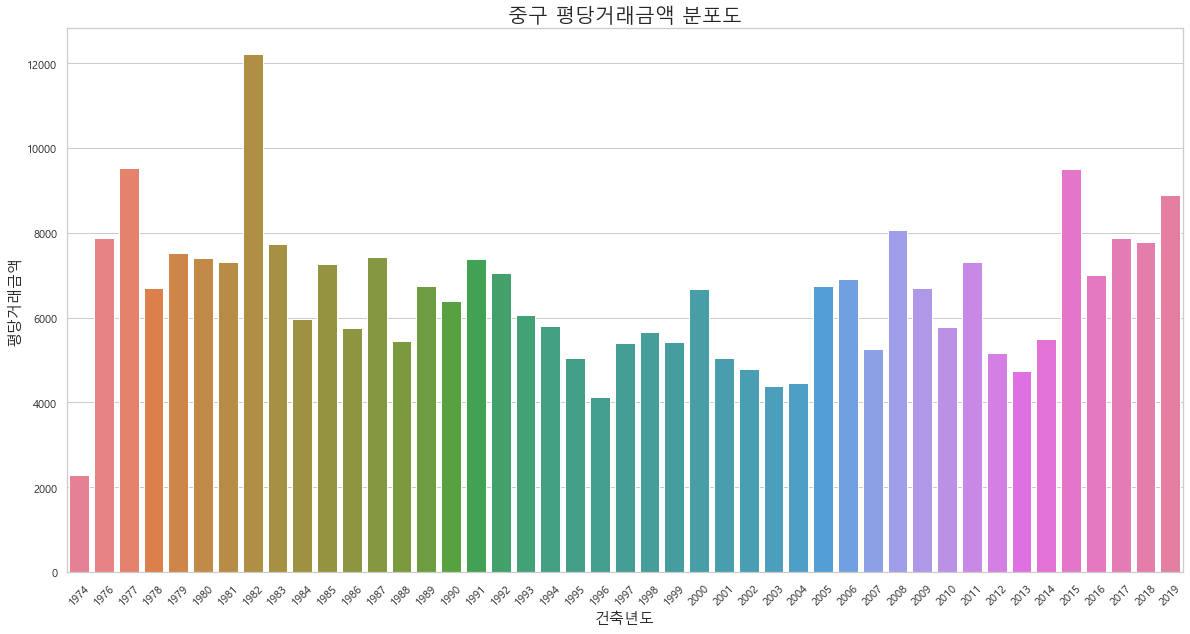

In [39]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_j = df['시군구명'] == '중구'
j=df[is_gn]
df_j = j[['시군구명','평당거래금액','건축년도','아파트이름']]
jbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_j,palette = 'husl',ci=None)


plt.title('중구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("중구.png")

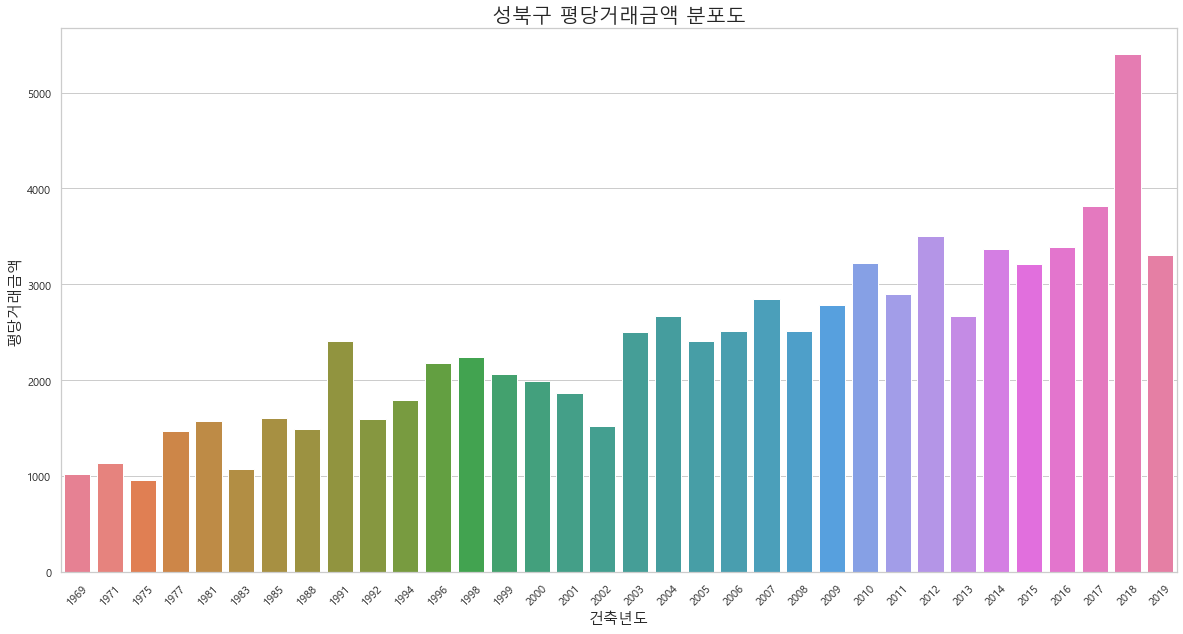

In [40]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_sb = df['시군구명'] == '성북구'
sb=df[is_sb]
df_sb = sb[['시군구명','평당거래금액','건축년도','아파트이름']]
sbbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_sb,palette = 'husl',ci=None)


plt.title('성북구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("성북구.png")

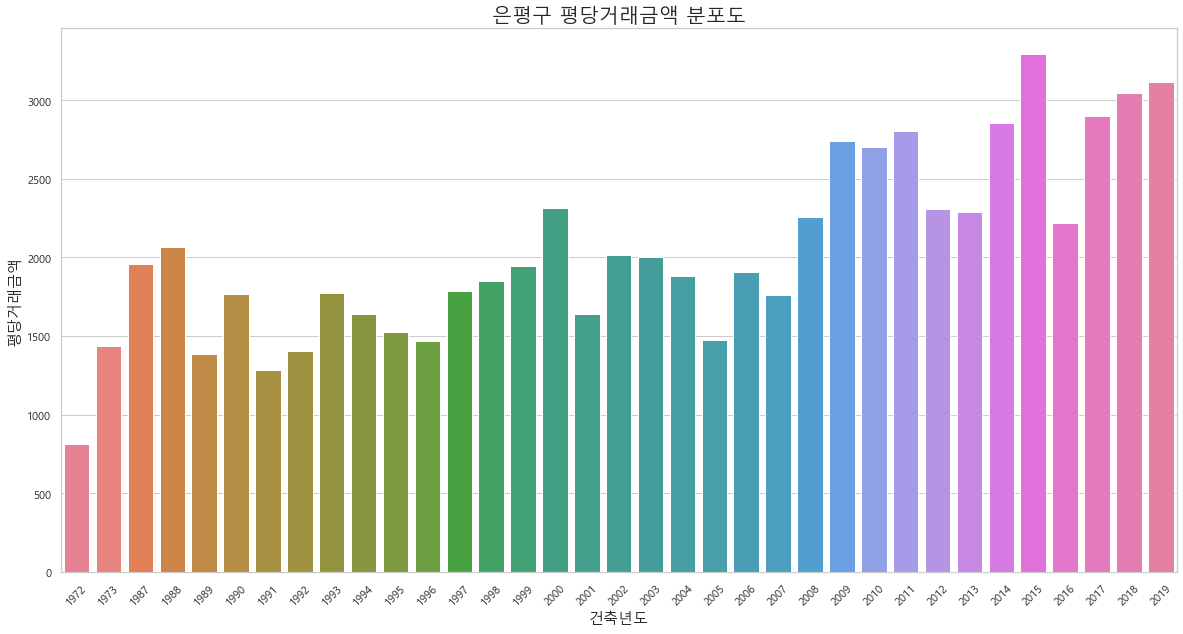

In [41]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_ep = df['시군구명'] == '은평구'
ep=df[is_ep]
df_ep = ep[['시군구명','평당거래금액','건축년도','아파트이름']]
epbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_ep,palette = 'husl',ci=None)


plt.title('은평구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("은평구.png")

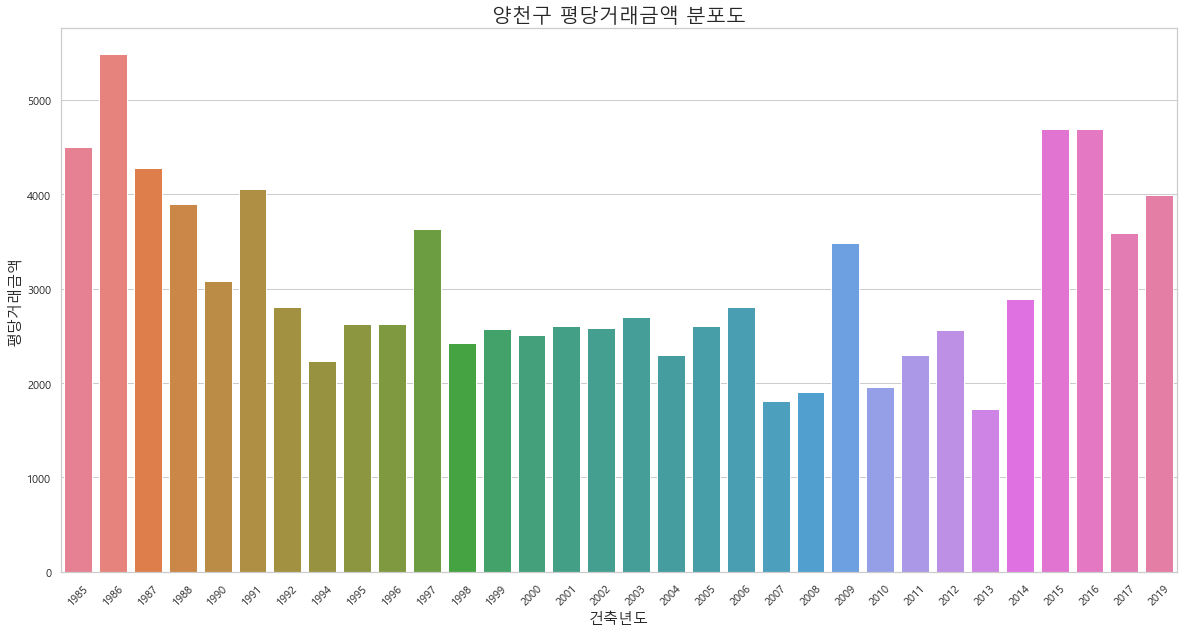

In [42]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_yc = df['시군구명'] == '양천구'
yc=df[is_yc]
df_yc = yc[['시군구명','평당거래금액','건축년도','아파트이름']]
ycbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_yc,palette = 'husl',ci=None)


plt.title('양천구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("양천구.png")

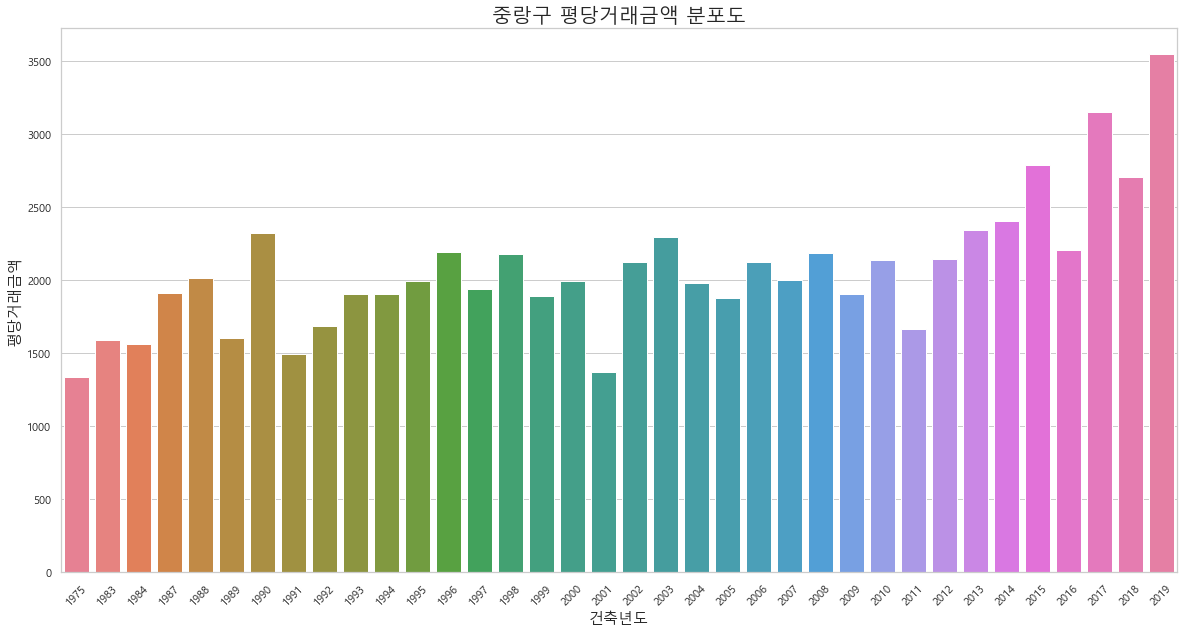

In [43]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_jn = df['시군구명'] == '중랑구'
jn=df[is_jn]
df_jn = jn[['시군구명','평당거래금액','건축년도','아파트이름']]
jnbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_jn,palette = 'husl',ci=None)


plt.title('중랑구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("중랑구.png")

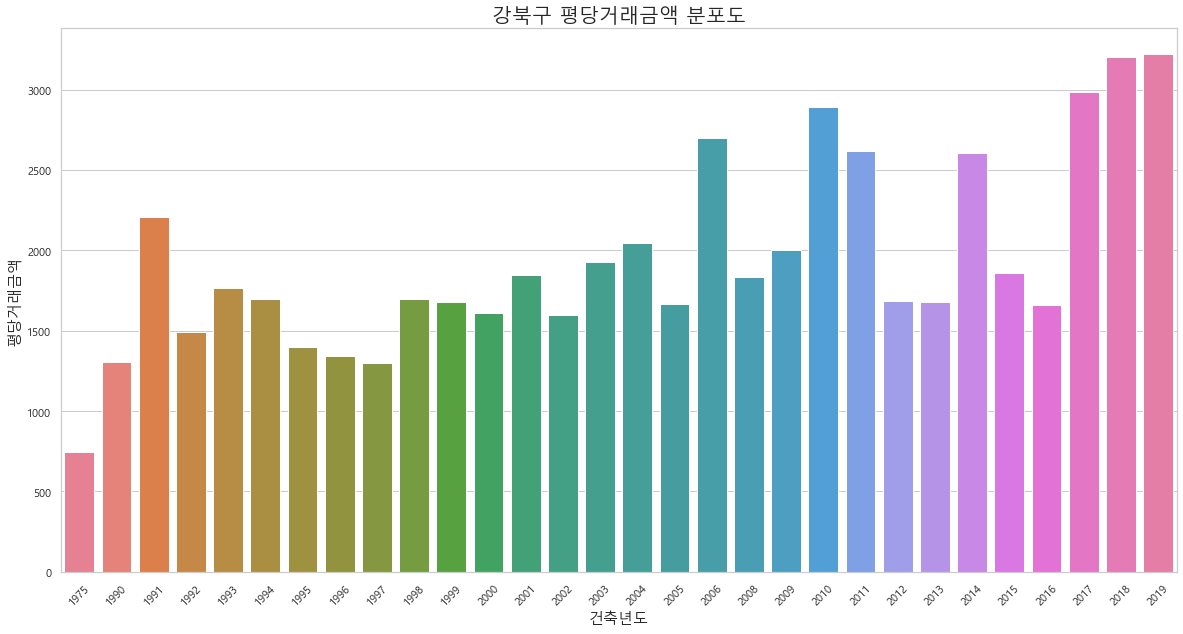

In [44]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gb = df['시군구명'] == '강북구'
gb=df[is_gb]
df_gb = gb[['시군구명','평당거래금액','건축년도','아파트이름']]
gbbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gb,palette = 'husl',ci=None)


plt.title('강북구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("강북구.png")

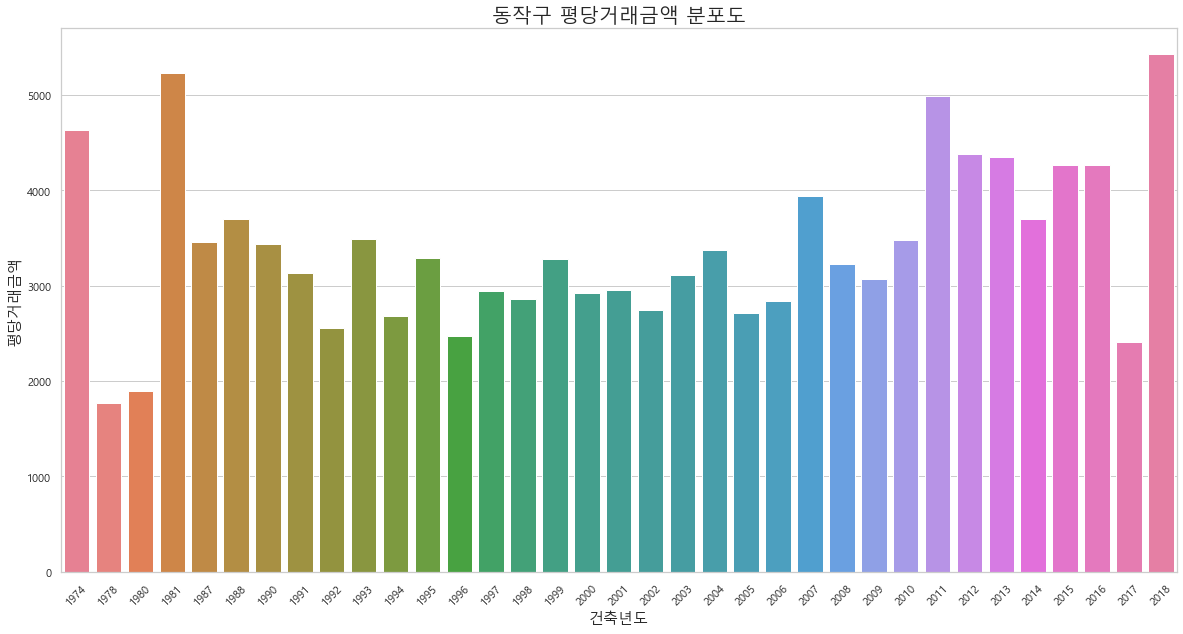

In [45]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_dj = df['시군구명'] == '동작구'
dj=df[is_dj]
df_dj = dj[['시군구명','평당거래금액','건축년도','아파트이름']]
djbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_dj,palette = 'husl',ci=None)


plt.title('동작구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("동작구.png")

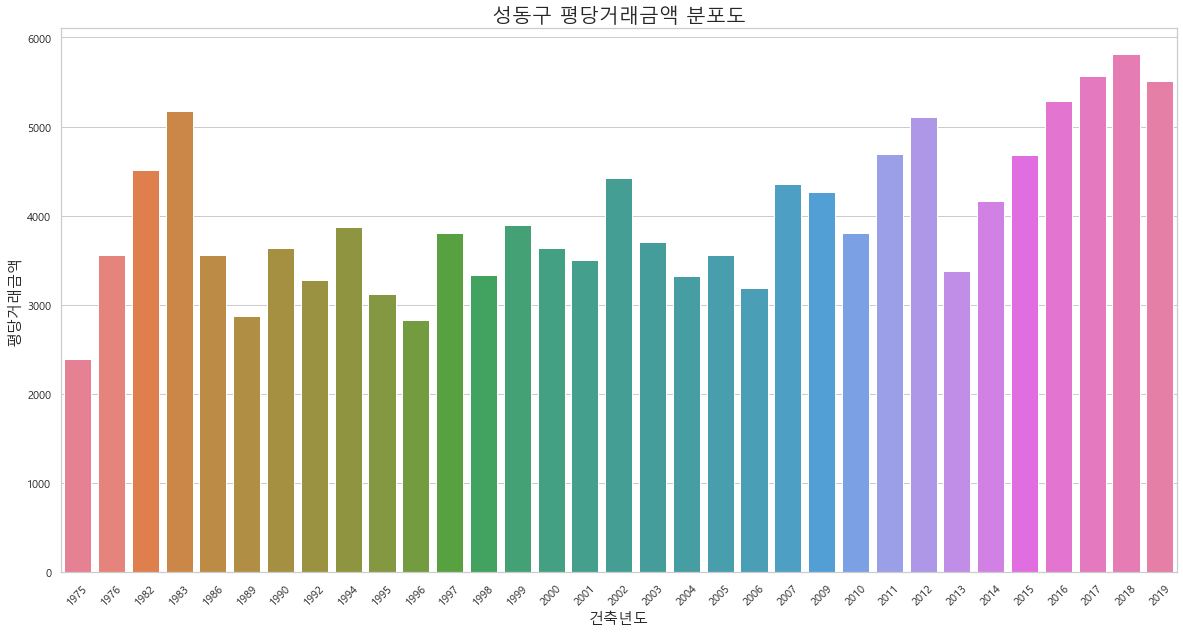

In [46]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_sd = df['시군구명'] == '성동구'
sd=df[is_sd]
df_sd = sd[['시군구명','평당거래금액','건축년도','아파트이름']]
sdbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_sd,palette = 'husl',ci=None)


plt.title('성동구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("성동구.png")

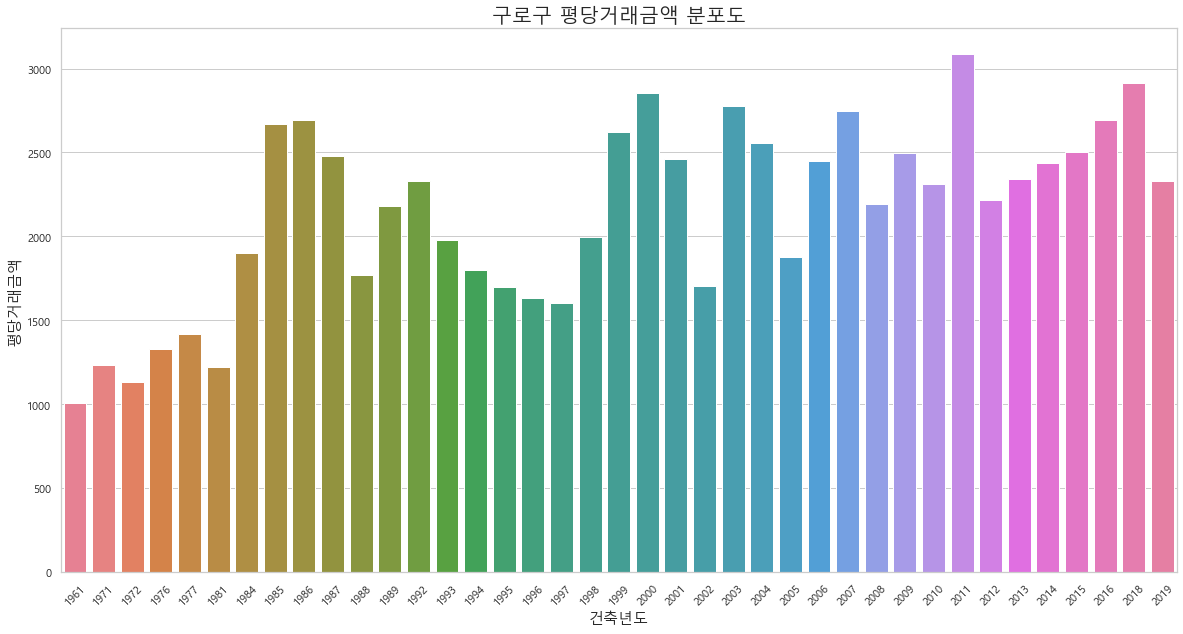

In [47]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gr = df['시군구명'] == '구로구'
gr=df[is_gr]
df_gr = gr[['시군구명','평당거래금액','건축년도','아파트이름']]
grbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gr,palette = 'husl',ci=None)


plt.title('구로구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("구로구.png")

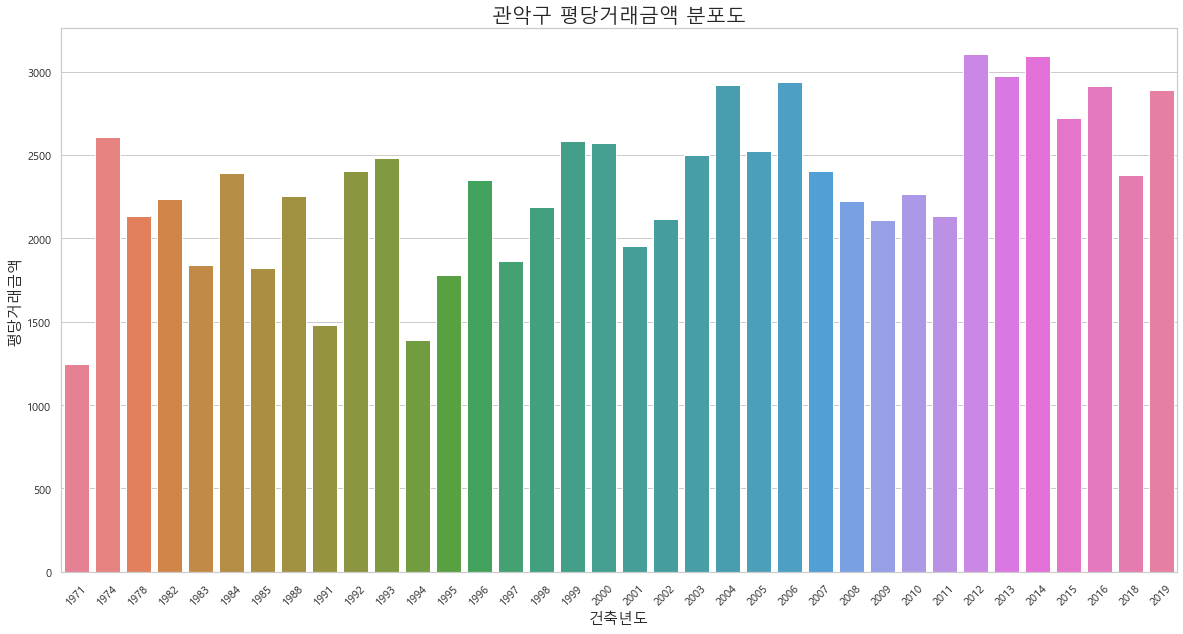

In [48]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_ga = df['시군구명'] == '관악구'
ga=df[is_ga]
df_ga = ga[['시군구명','평당거래금액','건축년도','아파트이름']]
gabar = sns.barplot(x="건축년도", y="평당거래금액", data=df_ga,palette = 'husl',ci=None)


plt.title('관악구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("관악구.png")

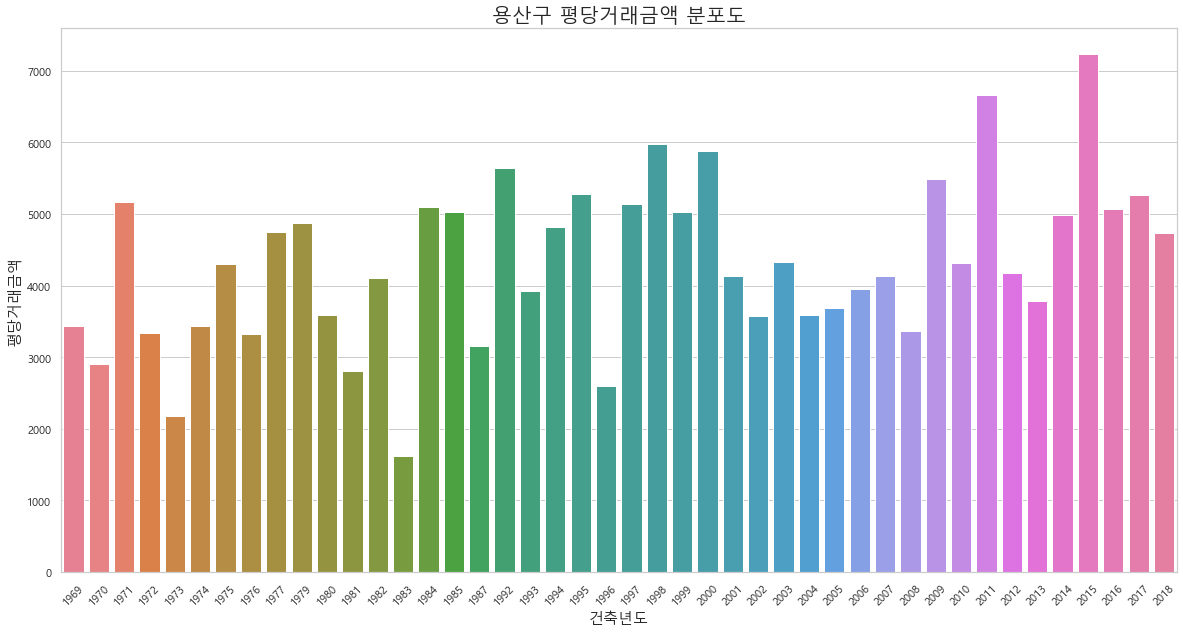

In [49]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_ys = df['시군구명'] == '용산구'
ys=df[is_ys]
df_ys = ys[['시군구명','평당거래금액','건축년도','아파트이름']]
ysbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_ys,palette = 'husl',ci=None)


plt.title('용산구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("용산구.png")

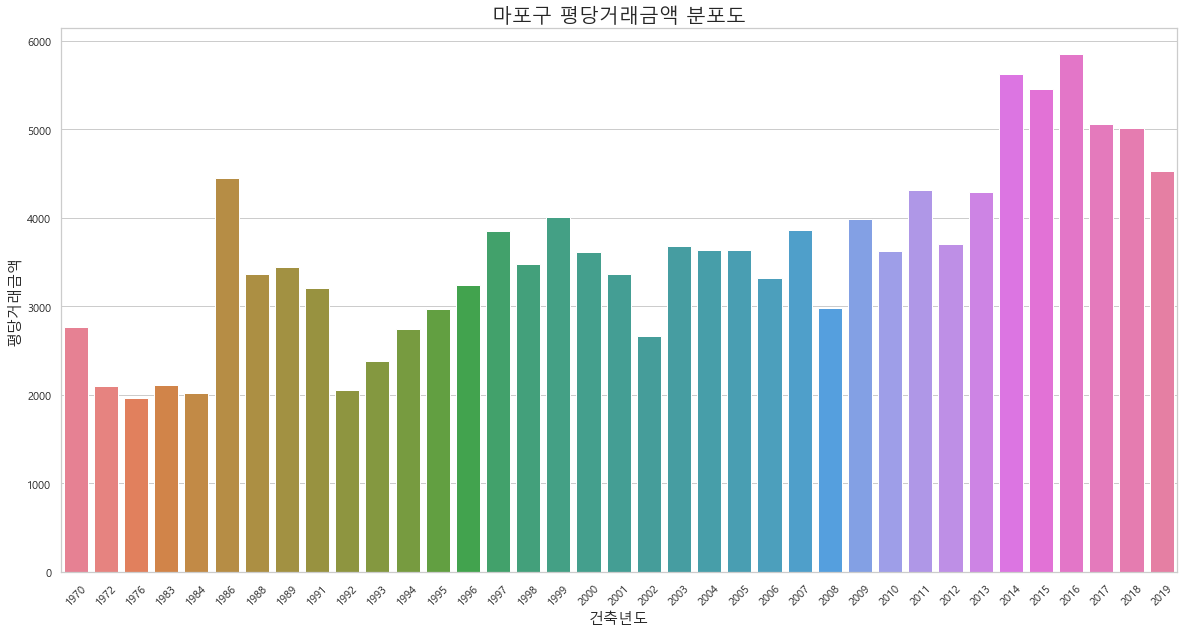

In [50]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_mp = df['시군구명'] == '마포구'
mp=df[is_mp]
df_mp = mp[['시군구명','평당거래금액','건축년도','아파트이름']]
mpbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_mp,palette = 'husl',ci=None)


plt.title('마포구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("마포구.png")

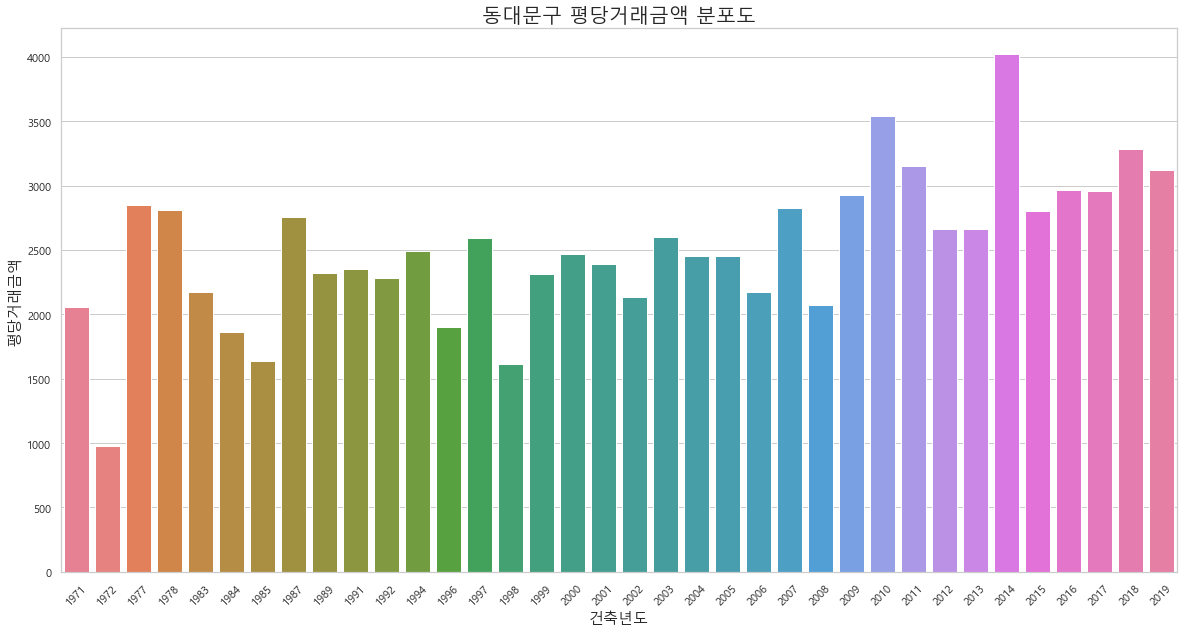

In [51]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_ddm = df['시군구명'] == '동대문구'
ddm=df[is_ddm]
df_ddm = ddm[['시군구명','평당거래금액','건축년도','아파트이름']]
ddmbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_ddm,palette = 'husl',ci=None)


plt.title('동대문구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("동대문구.png")

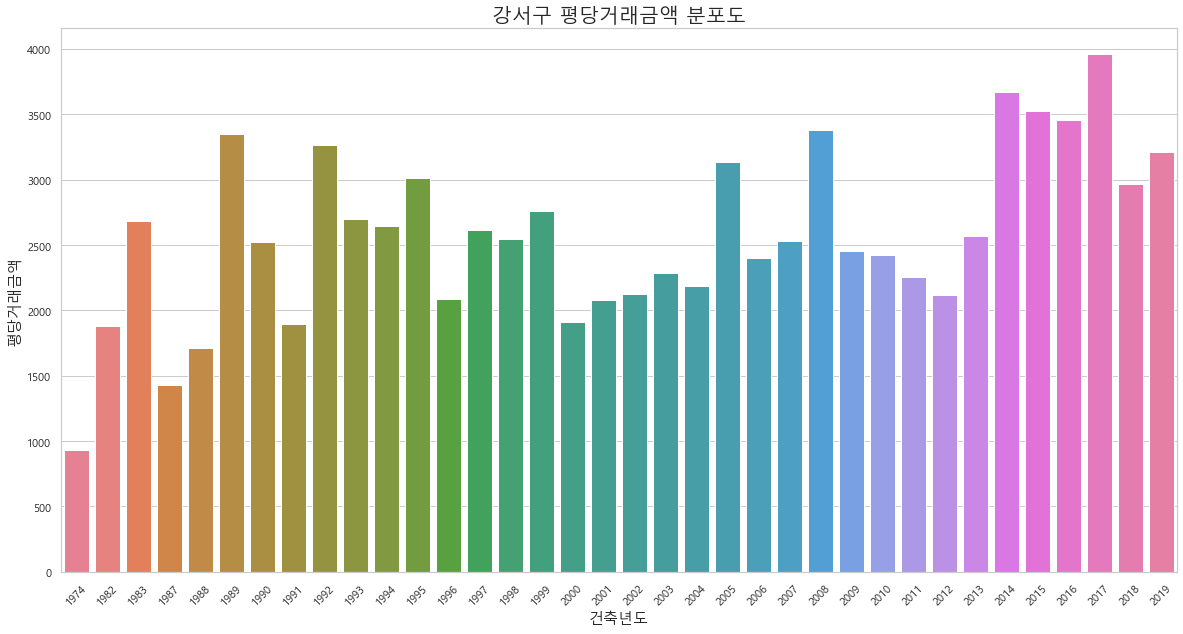

In [52]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gs = df['시군구명'] == '강서구'
gs=df[is_gs]
df_gs = gs[['시군구명','평당거래금액','건축년도','아파트이름']]
gsbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gs,palette = 'husl',ci=None)


plt.title('강서구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("강서구.png")

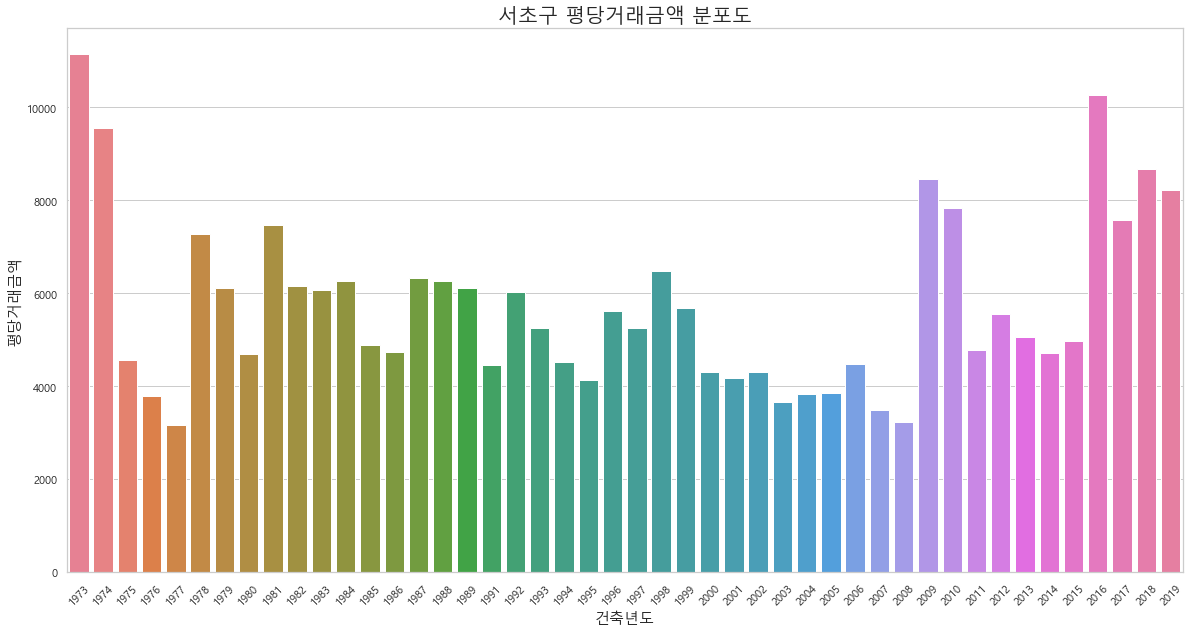

In [53]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_sc = df['시군구명'] == '서초구'
sc=df[is_sc]
df_sc = sc[['시군구명','평당거래금액','건축년도','아파트이름']]
scbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_sc,palette = 'husl',ci=None)


plt.title('서초구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("서초구.png")

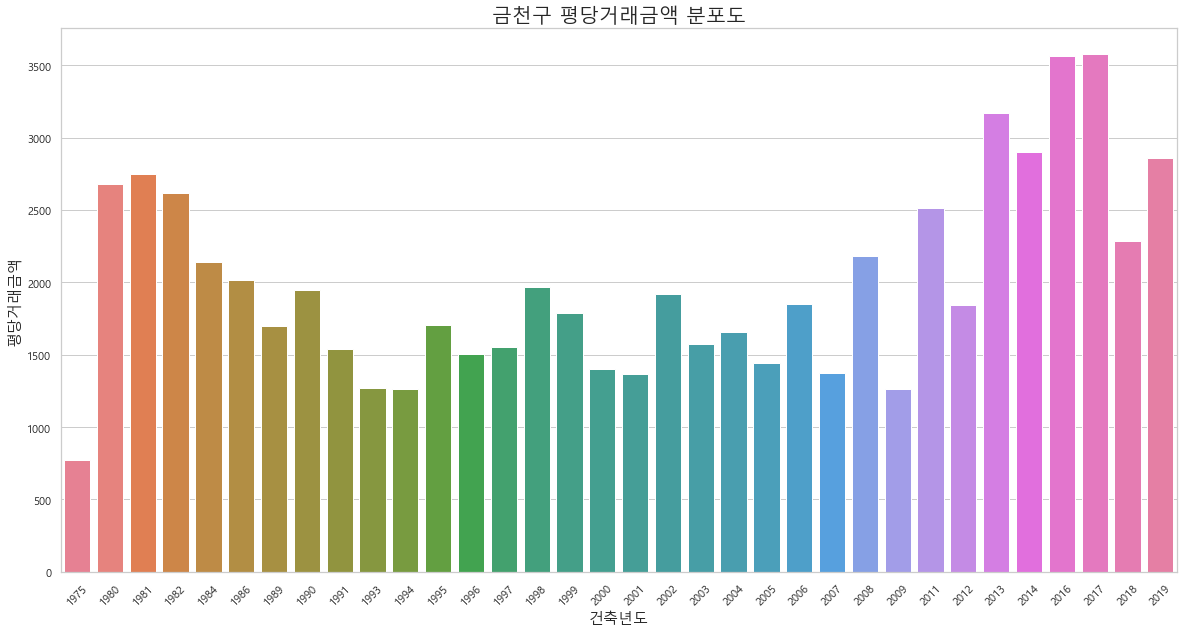

In [54]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_gc = df['시군구명'] == '금천구'
gc=df[is_gc]
df_gc = gc[['시군구명','평당거래금액','건축년도','아파트이름']]
gcbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_gc,palette = 'husl',ci=None)


plt.title('금천구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("금천구.png")

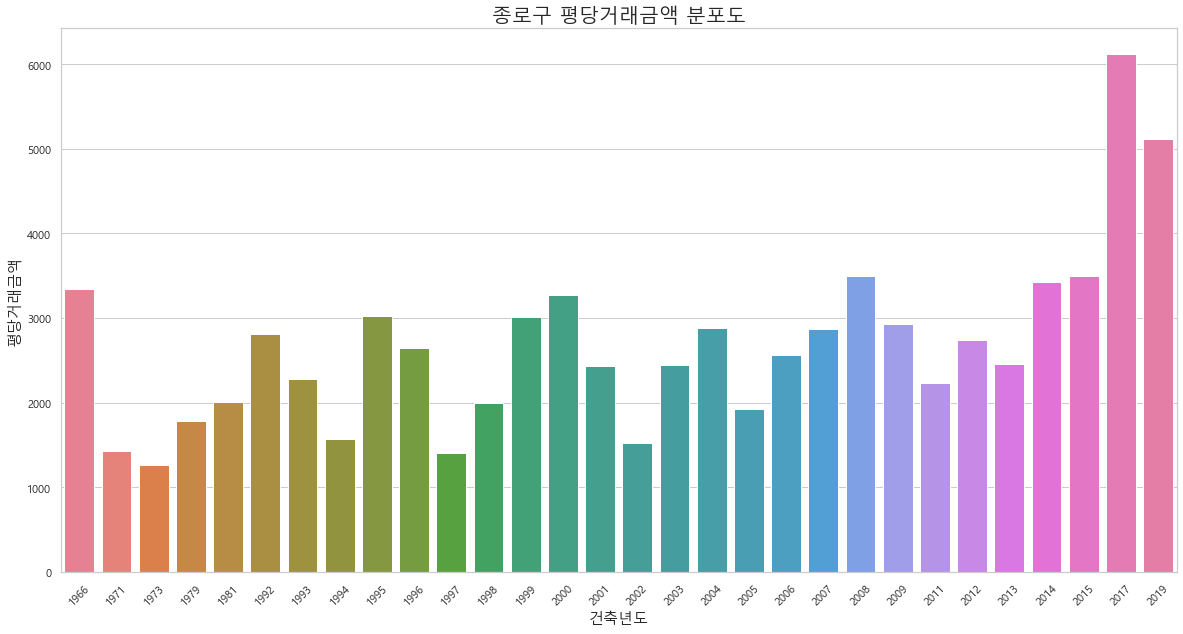

In [55]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_jr = df['시군구명'] == '종로구'
jr=df[is_jr]

df_jr = jr[['시군구명','평당거래금액','건축년도']]

plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)

plt.title('종로구 평당거래금액 분포도',size=20)
plt.xticks(rotation = 45 )
jgbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_jr, palette = 'husl',ci=None)
plt.savefig("종로구.png")

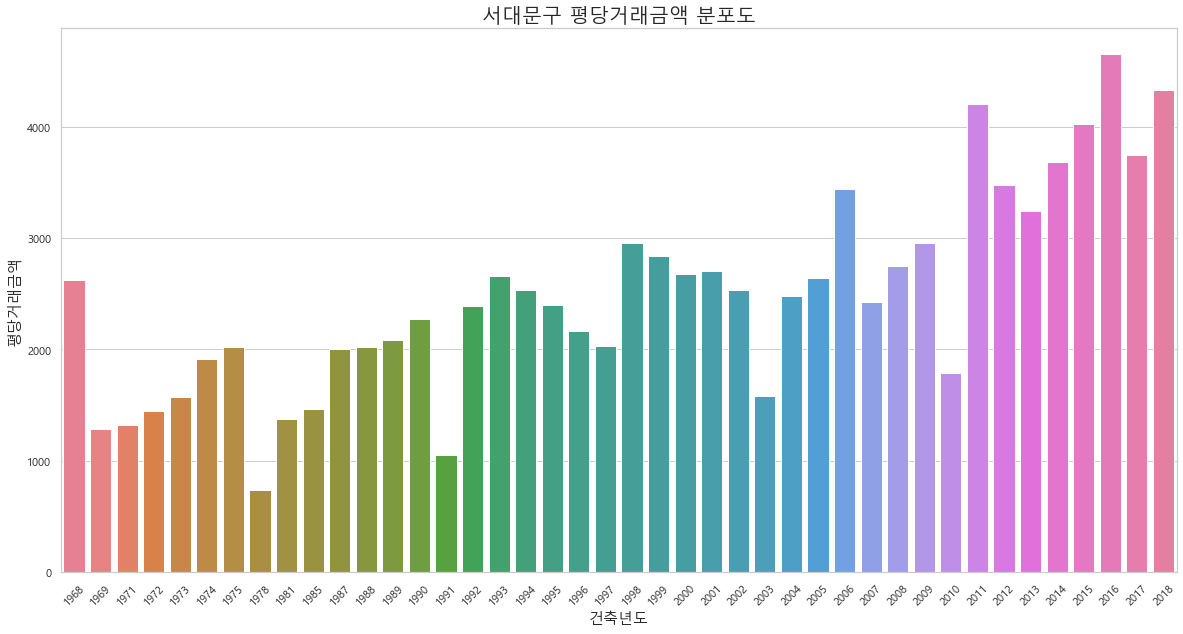

In [56]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

is_sdm = df['시군구명'] == '서대문구'
sdm=df[is_sdm]
df_sdm = sdm[['시군구명','평당거래금액','건축년도','아파트이름']]
sdmbar = sns.barplot(x="건축년도", y="평당거래금액", data=df_sdm,palette = 'husl',ci=None)


plt.title('서대문구 평당거래금액 분포도',size=20)
plt.xlabel('건축년도',size=15)
plt.ylabel('평당거래금액',size=15)
plt.xticks(rotation = 45 )
plt.savefig("서대문구.png")

In [57]:
# df_ydp.sort_values(by=['평당거래금액'], ascending=False)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. 시각화


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [59]:
# Load the example flights dataset and convert to long-form
flights = flights_long.pivot("시군구명", "거래월", "passengers")

NameError: name 'flights_long' is not defined

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
# 위에서 계산된 결과(거래량)를 heatmap 시각화를 합니다.
